In [1]:
import pandas as pd
import matplotlib.pyplot as mapo
import seaborn as sebo

df=pd.read_csv("bollywood.csv")

In [3]:
num_records = df.shape[0]
print("Number of records in the dataset:", num_records)

Number of records in the dataset: 149


In [5]:
genre_counts = df['Genre'].value_counts().sort_values(ascending=False)
print("Number of movies released in each genre:\n", genre_counts)

Number of movies released in each genre:
 Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: count, dtype: int64


In [7]:
most_common_genre = genre_counts.idxmax()
print("Genre with the highest number of releases:", most_common_genre)

Genre with the highest number of releases: Comedy


In [11]:
genre_release_time_crosstab = pd.crosstab(df['Genre'], df['ReleaseTime'])
print("Crosstab of Genre and ReleaseTime:\n\n", genre_release_time_crosstab)

Crosstab of Genre and ReleaseTime:

 ReleaseTime  FS  HS  LW   N
Genre                      
 Drama        4   6   1  24
Action        3   3   3  12
Action        0   0   0   3
Comedy        3   5   5  23
Romance       3   3   4  15
Thriller      4   1   1  20
Thriller      0   0   1   2


In [15]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Release Date'])

# Extract the month from 'Release Date'
df['Month'] = df['Release Date'].dt.month

# Count the number of movie releases by month
month_counts = df['Month'].value_counts().sort_values(ascending=False)
print("Number of movie releases by month:\n", month_counts)

Number of movie releases by month:
 Month
1     20
3     19
5     18
7     16
2     16
4     11
9     10
6     10
11    10
10     9
8      8
12     2
Name: count, dtype: int64


In [19]:
#highbudget : >=25
high_budget_movies = df[df['Budget'] >= 25]
high_budget_month_counts = high_budget_movies['Month'].value_counts().sort_values(ascending=False)
print("Number of high budget movie releases by month:\n", high_budget_month_counts)

Number of high budget movie releases by month:
 Month
2     9
1     8
3     7
8     7
11    6
7     6
9     5
6     5
4     4
10    4
5     3
12    2
Name: count, dtype: int64


In [21]:
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']
top_10_roi_movies = df.nlargest(10, 'ROI')[['MovieName', 'ROI']]
print("Top 10 movies with maximum ROI:\n", top_10_roi_movies)

Top 10 movies with maximum ROI:
                      MovieName       ROI
64                  Aashiqui 2  8.166667
89                          PK  7.647059
132                Grand Masti  7.514286
135               The Lunchbox  7.500000
87                      Fukrey  6.240000
58                    Mary Kom  5.933333
128                     Shahid  5.666667
37   Humpty Sharma Ki Dulhania  5.500000
101         Bhaag Milkha Bhaag  4.466667
115            Chennai Express  4.266667


In [23]:
average_roi_by_release_time = df.groupby('ReleaseTime')['ROI'].mean()
print("Average ROI for different release times:\n", average_roi_by_release_time)

Average ROI for different release times:
 ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64


In [25]:
correlation_box_office_youtube_likes = df['BoxOfficeCollection'].corr(df['YoutubeLikes'])
print("Correlation between box office collection and YouTube likes:", correlation_box_office_youtube_likes)

Correlation between box office collection and YouTube likes: 0.6825165877731297


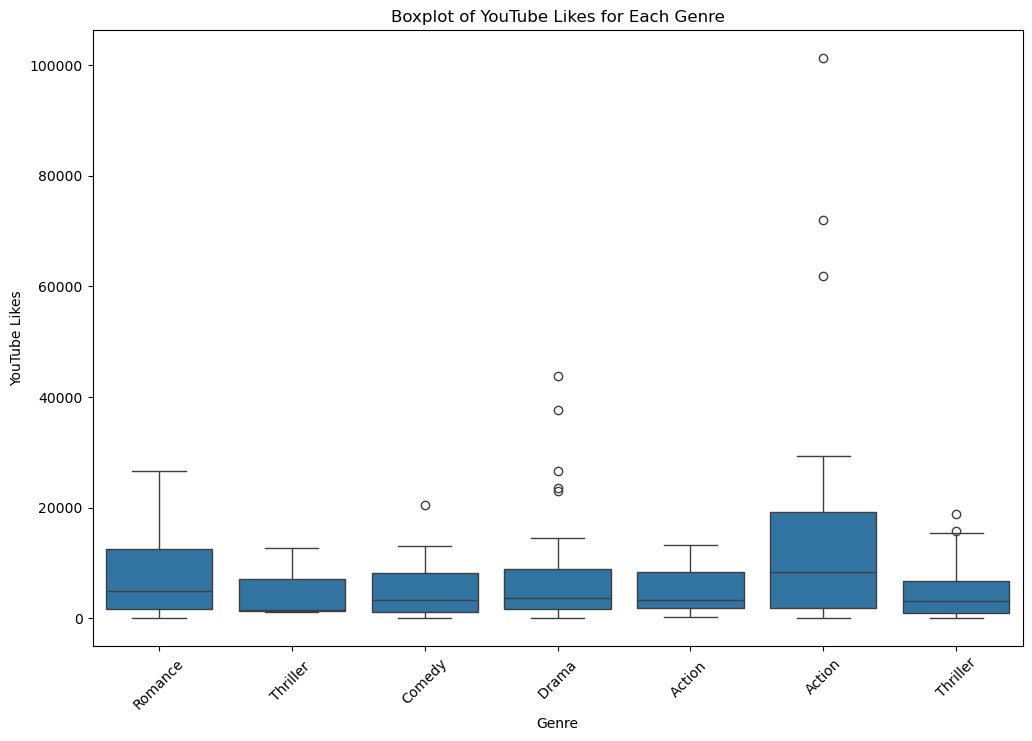

In [32]:
#Boxplots of YouTube likes for each genre
mapo.figure(figsize=(12, 8))
sebo.boxplot(x='Genre', y='YoutubeLikes', data=df)
mapo.title('Boxplot of YouTube Likes for Each Genre')
mapo.xlabel('Genre')
mapo.ylabel('YouTube Likes')
mapo.xticks(rotation=45)
mapo.show()

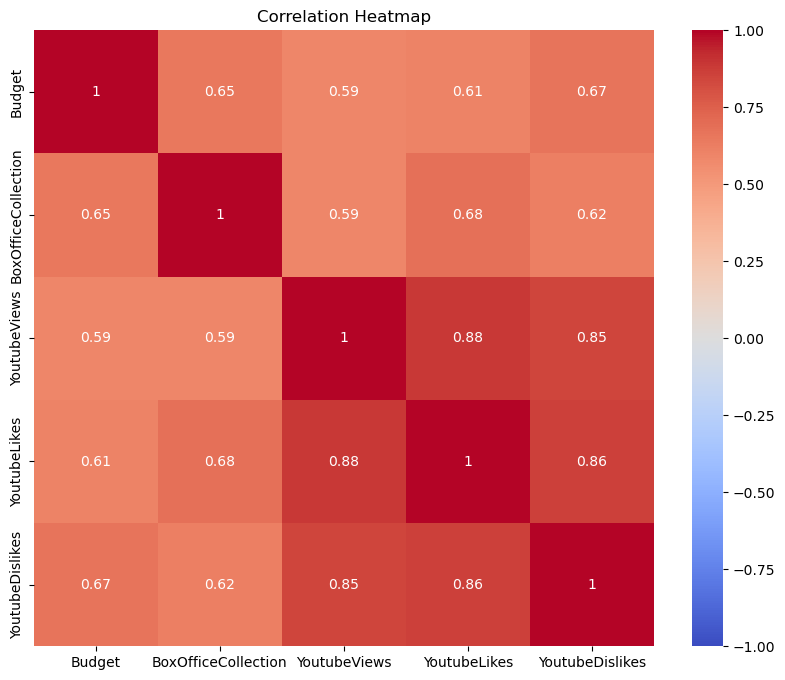

In [34]:
#Pair plot or heatmap of correlations among Budget, BoxOfficeCollection, YoutubeViews, YoutubeLikes, YoutubeDislikes
correlation_matrix = df[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']].corr()
mapo.figure(figsize=(10, 8))
sebo.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
mapo.title('Correlation Heatmap')
mapo.show()

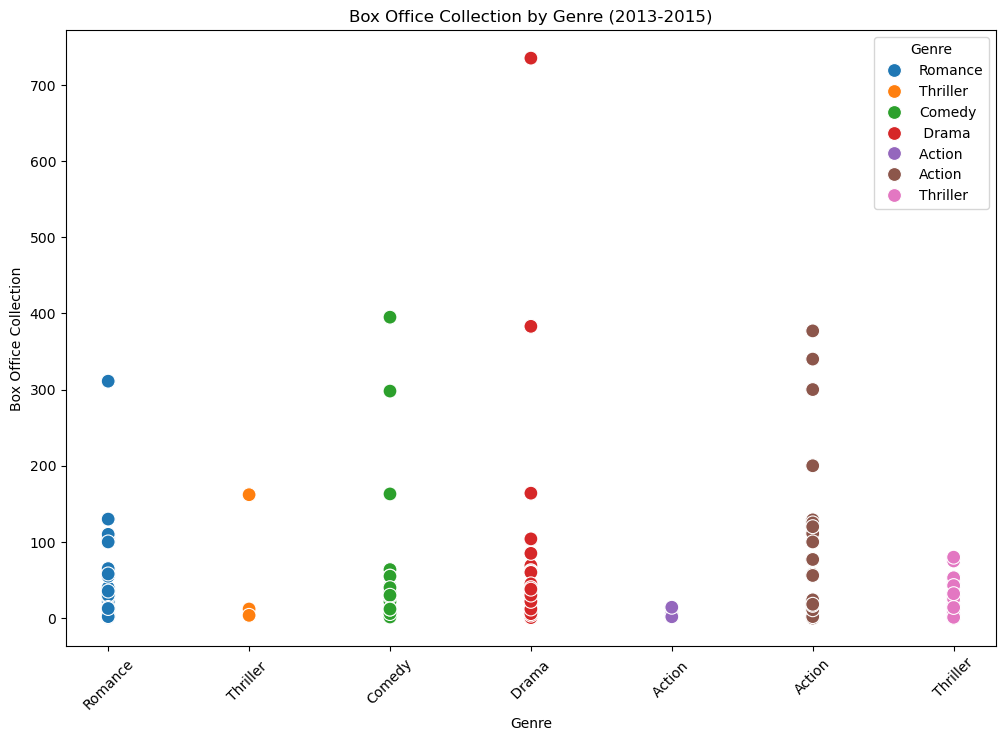

In [36]:
#Highlight the genre of movies and their box office collection (2013-2015)
mapo.figure(figsize=(12, 8))
sebo.scatterplot(x='Genre', y='BoxOfficeCollection', data=df, hue='Genre', s=100)
mapo.title('Box Office Collection by Genre (2013-2015)')
mapo.xlabel('Genre')
mapo.ylabel('Box Office Collection')
mapo.xticks(rotation=45)
mapo.show()

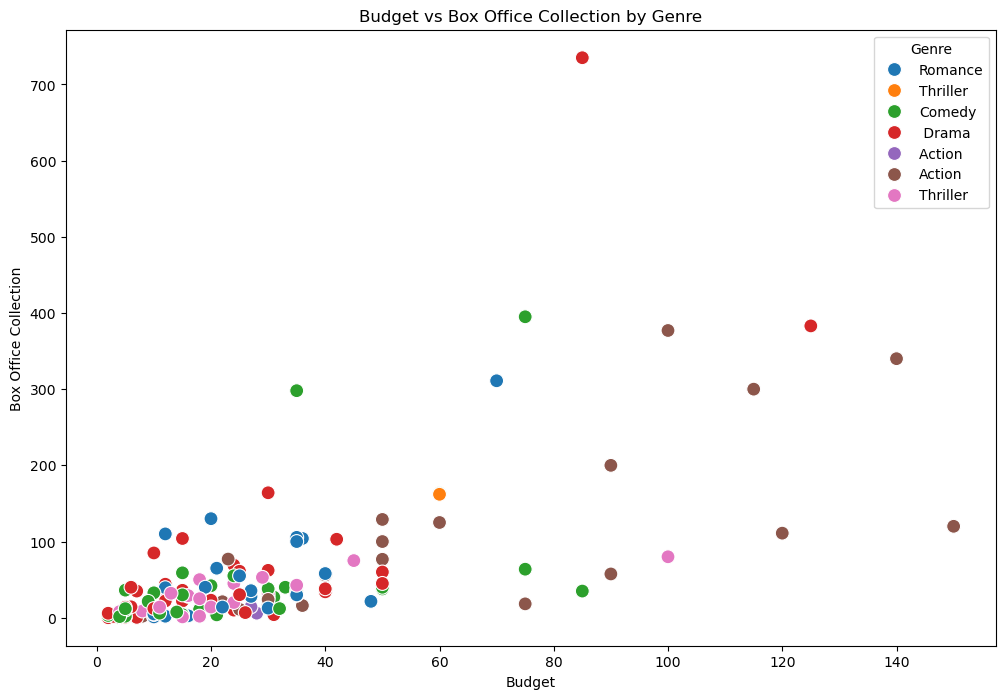

In [38]:
#Visualize the Budget and Box office collection based on Genre
mapo.figure(figsize=(12, 8))
sebo.scatterplot(x='Budget', y='BoxOfficeCollection', data=df, hue='Genre', s=100)
mapo.title('Budget vs Box Office Collection by Genre')
mapo.xlabel('Budget')
mapo.ylabel('Box Office Collection')
mapo.show()

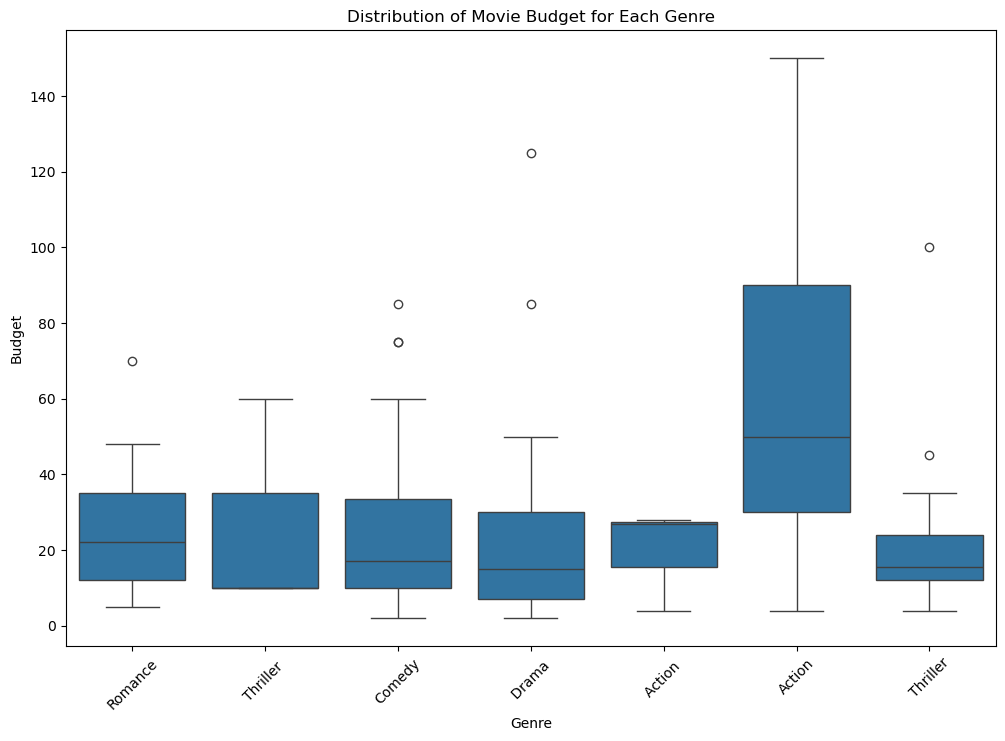

In [40]:
#Distribution of movie budget for every Genre
mapo.figure(figsize=(12, 8))
sebo.boxplot(x='Genre', y='Budget', data=df)
mapo.title('Distribution of Movie Budget for Each Genre')
mapo.xlabel('Genre')
mapo.ylabel('Budget')
mapo.xticks(rotation=45)
mapo.show()

In [42]:
#Number of movies released in every year (2013-2015)
df['Year'] = df['Release Date'].dt.year
year_counts = df['Year'].value_counts().sort_values(ascending=False)
print("Number of movies released in each year (2013-2015):\n", year_counts)

Number of movies released in each year (2013-2015):
 Year
2014    70
2013    67
2015    12
Name: count, dtype: int64


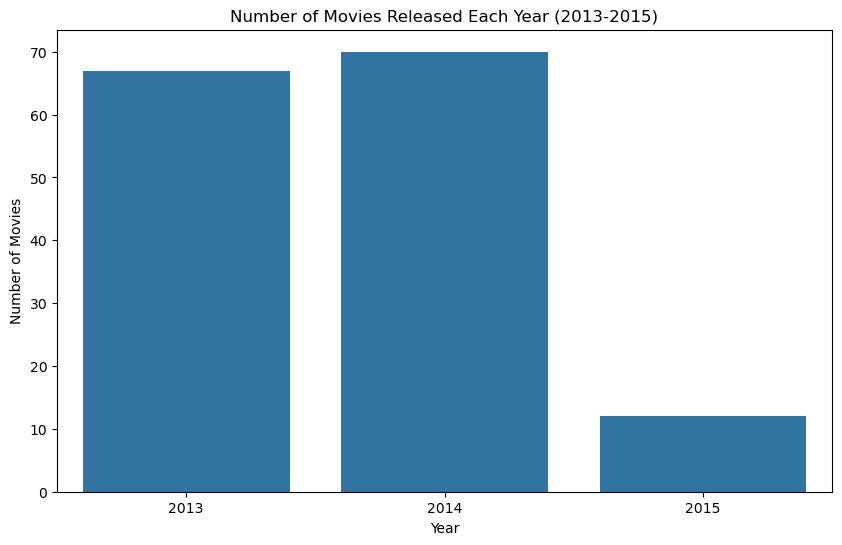

In [44]:
#Visualize number of movies released in each year
mapo.figure(figsize=(10, 6))
sebo.barplot(x=year_counts.index, y=year_counts.values)
mapo.title('Number of Movies Released Each Year (2013-2015)')
mapo.xlabel('Year')
mapo.ylabel('Number of Movies')
mapo.show()